<a href="https://colab.research.google.com/github/BrunoASNascimento/fashion_mnist_clasification/blob/master/fashion_mnist_clasification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import tensorflow
from tensorflow import keras
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import numpy as np

In [2]:
np.SEED = 13

In [3]:
dataset = keras.datasets.fashion_mnist
((img_train,info_train),(img_test,info_test)) = dataset.load_data() #LOAD DATA

In [4]:
print(f'Train: {img_train.shape} \nTest: {img_test.shape}')

Train: (60000, 28, 28) 
Test: (10000, 28, 28)


Text(0.5, 1.0, '9')

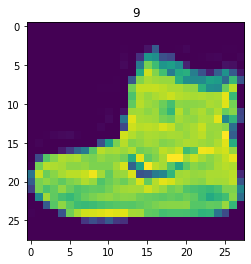

In [5]:
plt.imshow(img_train[0])
plt.title(info_train[0])

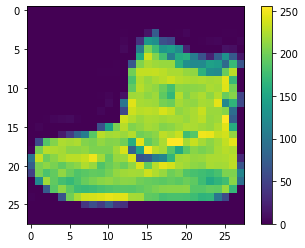

In [6]:
plt.imshow(img_train[0])
plt.colorbar()

In [7]:
names_info =['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

Max info: 9
Min info: 0


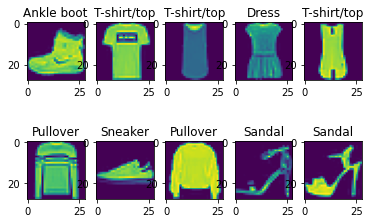

In [8]:
print(f'Max info: {info_train.max()}\nMin info: {info_train.min()}')
for imagem in range(10):
    plt.subplot(2,5,imagem+1)
    plt.imshow(img_train[imagem])
    plt.title(names_info[info_train[imagem]])

In [9]:
img_train= img_train/float(255) # Normalization color

model = keras.Sequential(
    [
     keras.layers.Flatten(input_shape=(28,28)), #Input: Transformation Linear algebra, R2 -> R1
     keras.layers.Dense(256,activation=tensorflow.nn.relu), #Processing: layers number
    #  keras.layers.Dense(128,activation=tensorflow.nn.relu), #Processing: layers number
    #  keras.layers.Dense(64,activation=tensorflow.nn.relu), #Processing: layers number
     keras.layers.Dropout(0.2), # Adormecer parte da rede
     keras.layers.Dense(10,activation=tensorflow.nn.softmax) #Output: Array with a list of probabilit of the classification correct
     ]
)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
historic = model.fit(img_train,info_train, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.5257 - accuracy: 0.8129 - val_loss: 0.4127 - val_accuracy: 0.8508
Epoch 2/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3992 - accuracy: 0.8550 - val_loss: 0.3705 - val_accuracy: 0.8678
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3623 - accuracy: 0.8670 - val_loss: 0.3634 - val_accuracy: 0.8686
Epoch 4/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3384 - accuracy: 0.8750 - val_loss: 0.3488 - val_accuracy: 0.8737
Epoch 5/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3245 - accuracy: 0.8796 - val_loss: 0.3436 - val_accuracy: 0.8756


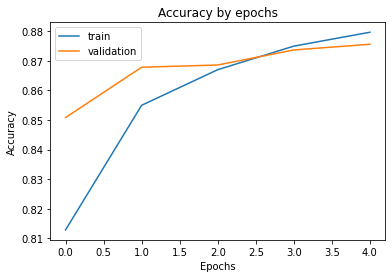

In [10]:
plt.plot(historic.history['accuracy'])
plt.plot(historic.history['val_accuracy'])
plt.title('Accuracy by epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train','validation'])

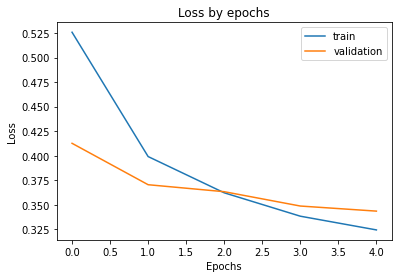

In [11]:
plt.plot(historic.history['loss'])
plt.plot(historic.history['val_loss'])
plt.title('Loss by epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['train','validation'])

In [12]:
tests = model.predict(img_test)

print(f'Result: {np.argmax(tests[3])}')
print(f'Real: {info_test[3]}')

Result: 1
Real: 1


In [13]:
loss_test, acc_test = model.evaluate(img_test,info_test)
print(f'Loss: {round(loss_test,3)}\nAccuracy: {round(acc_test*100,3)}%')

313/313 [==============================] - 1s 2ms/step - loss: 61.2851 - accuracy: 0.8512
Loss: 61.285
Accuracy: 85.12%


In [20]:
model.save('model.h5')
model_save = load_model('model.h5')

In [21]:
tests_save = model_save.predict(img_test)

print(f'Result: {np.argmax(tests_save[3])}')
print(f'Real: {info_test[3]}')

Result: 1
Real: 1
